In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Reading and Cleaning up the Data

In this part I have loaded the csv files and then filled in some missing values and deleted some rows due to them missing some vital information which cannot be filled in using mean imputation or mode imputation. This has been discussed at depth in Q1

In [ ]:
data=pd.read_csv('./TaxiData.csv')

##############----Data cleanup----###############


data.drop(columns=['pickup_census_tract'], inplace=True)

#replacing missing values with mode
categories = ['company', 'payment_type']
for col in categories:
    data[col].fillna(data[col].mode()[0], inplace=True)

#replacing missing values with mean
numericalData = ['fare', 'trip_miles', 'trip_seconds', 'tips', 'dropoff_census_tract', 'dropoff_community_area']
for col in numericalData:
    data[col].fillna(data[col].mean(), inplace=True)

#deleting rows with missing latitude or longitude
data.dropna(subset=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], inplace=True)

#getting date and time from time stamp
data['trip_start_timestamp'] = pd.to_datetime(data['trip_start_timestamp'], unit='s')

# print(data.info())
# print (data)

C:\Users\HP\AppData\Local\Temp\ipykernel_25096\2773138104.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_25096\2773138104.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [ ]:
#creating columns that will be needed but aren't readily present to extract in
#the csv file (yet, that is)

data['day_of_week'] = data['trip_start_timestamp'].dt.dayofweek


# print(data['day_of_week'])

## 2a. Trip Frequency by Time of Day, Month, and Day

<h3>Comparing with Hours of the Day</h3>
Seeing the plot of trip frequency against the hours of the day, we can see that the peak demand hours are from 6pm to 8pm (although from 5pm-10pm also there is a high demand but it is particularly high for this interval). 
<br>
During late night and early morning hours, there is a very low demand during this time, all changes of drivers, maintenance work can be scheduled during this time. In the peak hours a higher number of taxis can be deployed during these hours.
<br><br>
From this information, any dealership can arrange their fleet to have a higher number of cars during the more busy time and accordingly schedule maintenance work and change of drivers during shift changes to provide adequate rest to the drivers between their shifts. They can also further analyse the places where there is a higher demand on these days and station parts of their fleet close to these places to attract more passengers. For example, during peak demand hours, more vehicles could be stationed around offices and residential areas or places which are associated with the routine activities during this time.

C:\Users\HP\AppData\Local\Temp\ipykernel_25096\4235451828.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='trip_start_hour', palette='viridis')


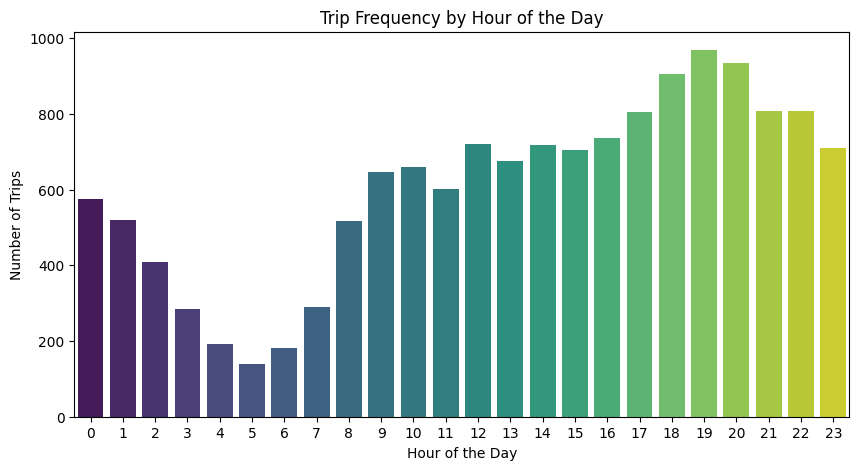

In [8]:
# Bar chart for trip frequency by hour of day
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='trip_start_hour', palette='viridis')
plt.title('Trip Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

<h3>Comparing with Day of the Week</h3>
We can see that the peak traffic comes on Friday followed by Saturday followed by Thursday. The week starts off mellow but traffic builds up until Friday, it is still higher than the week's lowest on Saturday but it comes close to it's lowest value on Sunday.
<br>
Also from the weekday vs weekend plot, we can work out the average demand on weekdays to be a little over 1900 and on weekends it is over 2000. So the average demand is higher on weekends than on weekdays.

C:\Users\HP\AppData\Local\Temp\ipykernel_25096\217089893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='day_of_week', palette='viridis')


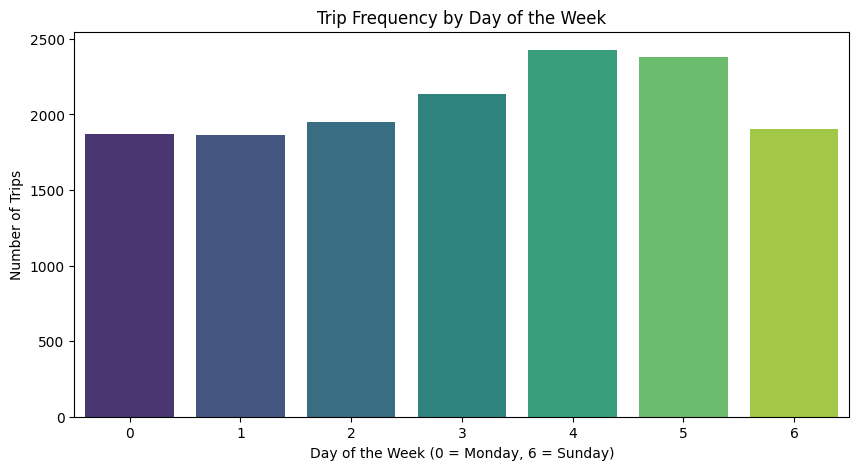

C:\Users\HP\AppData\Local\Temp\ipykernel_25096\217089893.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='weekend', palette='viridis')


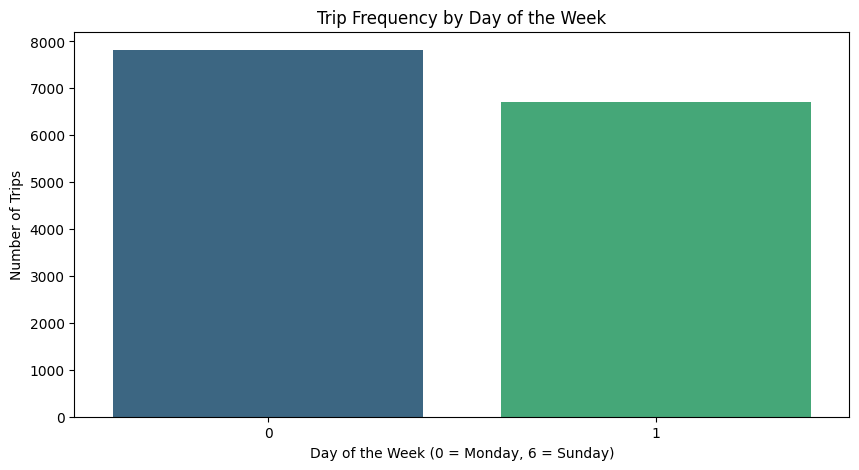

In [56]:
# Bar chart for trip frequency by day of the week
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='day_of_week', palette='viridis')
plt.title('Trip Frequency by Day of the Week')
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Number of Trips')
plt.show()

data['weekend'] = np.where(data['day_of_week'] >= 4, 1, 0)

plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='weekend', palette='viridis')
plt.title('Trip Frequency by Day of the Week')
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Number of Trips')
plt.show()

<h3>Comparing with the Month of the year</h3>
During the months of April to August, there is a higher average demand and in the month of October too the demand is high. From the month of January to the month of May, the demand increases till the end. Since the data is from the US, the higher than neighbouring months' demand in October and December can be credited to the holiday season. The higher average demand during the spring/summer months can be attributed to work, school months followed by vacation months.

C:\Users\HP\AppData\Local\Temp\ipykernel_25096\2719702772.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='trip_start_month', palette='viridis')


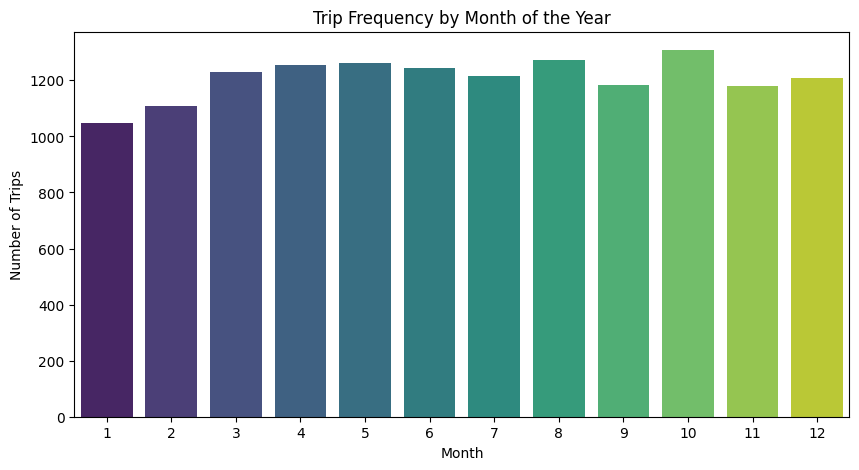

In [ ]:
# Bar chart for trip frequency by month
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='trip_start_month', palette='viridis')
plt.title('Trip Frequency by Month of the Year')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.show()

## 2b. Peak Hours and Distance Analysis

From the heatmap, we can see that the peak hours are during 6pm to 8pm. Also during 5pm to 10pm is also is also higher that usual demand but the highest demand comes during 6 to 8pm.
<br>
We can see that the most frequently occuring distance during these hours is around the zero mile mark and fewer taxis are taken for larger distances. From this we can draw the conclusion that people travelling during this time aren't travelling very far from their point of pick up which is consistent with the fact that this is the time when people leave their workplaces to travel back or leave the house to buy something and in both cases, more often than not, these end points tend to be close to each other.

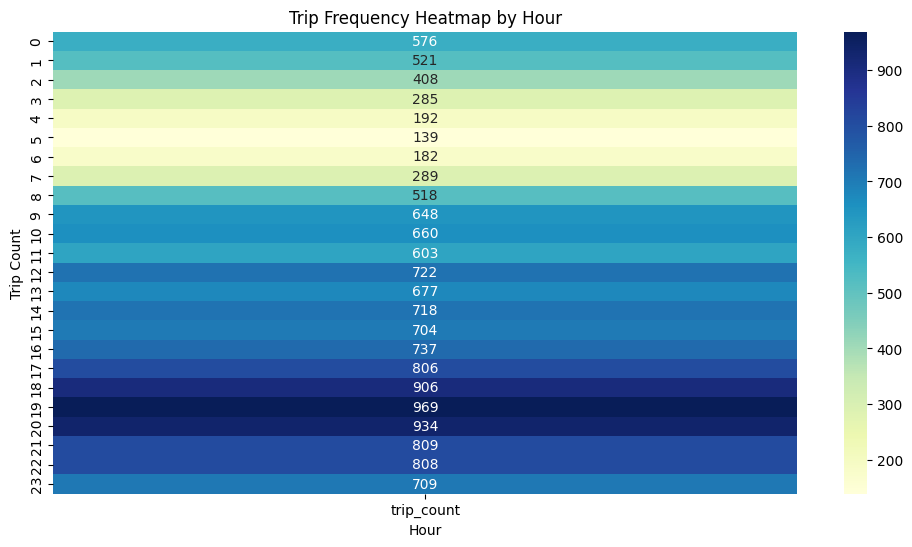

In [17]:
# Heatmap for trip frequency by hour
hourly_counts = data.groupby(['trip_start_hour']).size().reset_index(name='trip_count')
hourly_counts.set_index('trip_start_hour', inplace=True)
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_counts, cmap='YlGnBu', annot=True, fmt="d")
plt.title('Trip Frequency Heatmap by Hour')
plt.xlabel('Hour')
plt.ylabel('Trip Count')
plt.show()


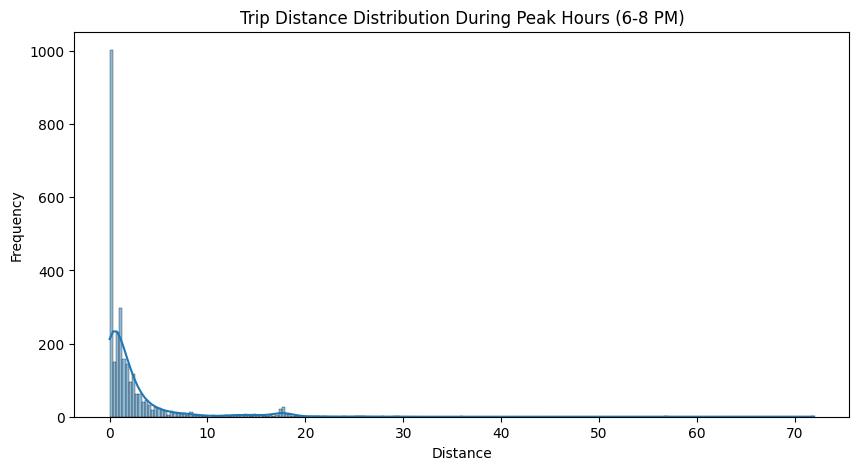

In [ ]:
# Assuming 'trip_distance' is a column in data
peak_hours = data[(data['trip_start_hour'] >= 18) & (data['trip_start_hour'] <= 20)]  # example: peak hours as 5-7 PM
plt.figure(figsize=(10, 5))
sns.histplot(peak_hours['trip_miles'], kde=True)
plt.title('Trip Distance Distribution During Peak Hours (6-8 PM)')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

## 2c. Trip Duration and Distance Distribution

First I have plotted histograms for both duration of trip and distance covered during the trip to gain insight on their individual distributions. Then I have plotted the scatter plots to envision them both together. Since most trips are over a short distance only, that is where the better part of the distribution lies. For smaller distances (below around 20 miles), the trip duration is quite close to an average value which increases with distance. Since duration over these small of distances is heavily influenced by traffic and wait time, distance alone, their correlation is very low (~0.15).
<br>
There were considerable outliers in this data more so in the metric of distance than duration (all print in the cell below). Setting them aside we can see that even though most taxi rides are around 1.5 to 2 miles (the average distance travelled is 2.7 miles), the time taken is very erratic which means that traffic congestion is having a major effect on the trip duration. Drawing from this, a possible reason for this could be that there is no elaborate network and most likely a single route connecting these pickup and drop off points which is why the traffic is getting congested. Another possible reason could be the dearth of taxis which means that the management needs to induct more vehicles into there fleet to ensure smoother proceeding.

In [ ]:
#finding outliers and studying them
threshold = 10000 

duration_above_threshold = data[data['trip_seconds']>threshold]

print(duration_above_threshold)
print('----------------------------------------------------------------------')
print(data[data['trip_miles']>50])

       pickup_community_area    fare  trip_start_month  trip_start_hour  \
9173                     6.0    9.85                 6               14   
9191                    22.0  175.05                12                7   
12307                    5.0    5.25                 5                4   

       trip_start_day trip_start_timestamp  pickup_latitude  pickup_longitude  \
9173                7  2014-06-14 14:15:00        41.934659        -87.646730   
9191                4  2014-12-24 07:45:00        41.928619        -87.685362   
12307               2  2013-05-27 04:00:00        41.947792        -87.683835   

       dropoff_latitude  dropoff_longitude  trip_miles  dropoff_census_tract  \
9173          41.914616         -87.631717         1.6          1.703107e+10   
9191          41.979071         -87.903040        71.7          1.703198e+10   
12307         41.947792         -87.683835         1.0          1.703135e+10   

      payment_type                    company  trip_s

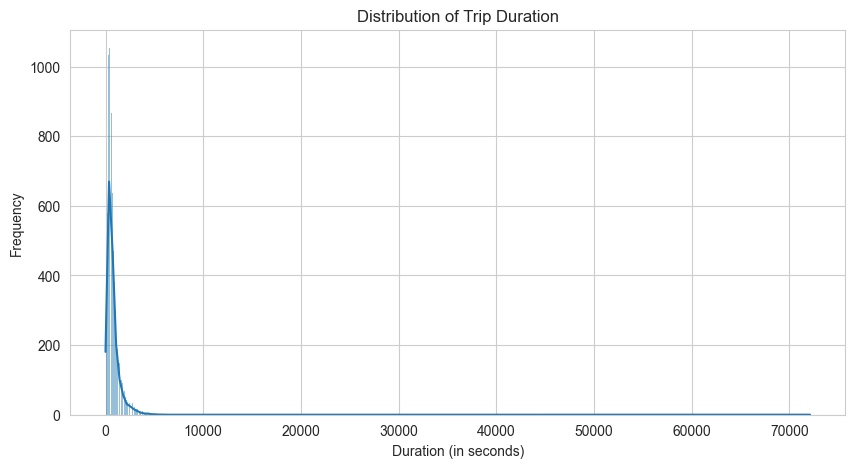

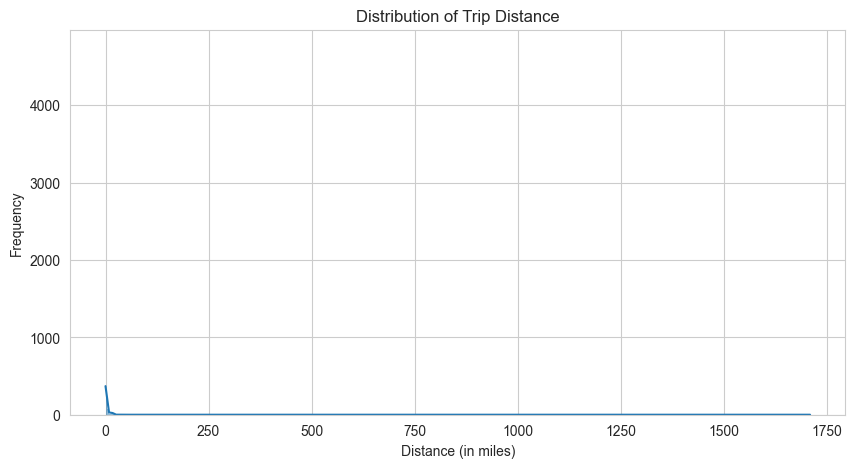

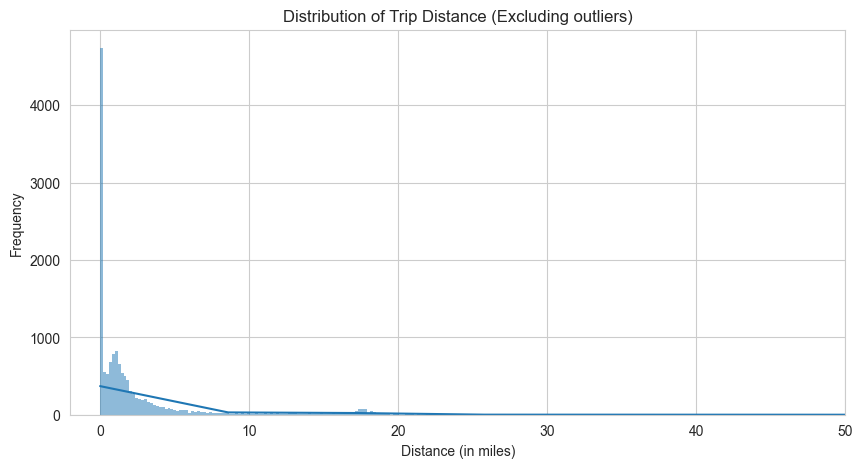

In [100]:
# Trip duration histogram
plt.figure(figsize=(10, 5))
sns.histplot(data['trip_seconds'], kde=True)  # Assuming 'trip_duration' column exists
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration (in seconds)')
plt.ylabel('Frequency')
plt.show()

count_above_threshold = (data['trip_miles'] > 1700).sum()
# print(count_above_threshold)

# Trip distance histogram (including outlier)
plt.figure(figsize=(10, 5))
sns.histplot(data['trip_miles'], kde=True)
plt.title('Distribution of Trip Distance')
# plt.ylim([0,700])
plt.xlabel('Distance (in miles)')
plt.ylabel('Frequency')
plt.show()


# Trip distance histogram (bulk of the data)
plt.figure(figsize=(10, 5))
sns.histplot(data['trip_miles'], kde=True)
plt.title('Distribution of Trip Distance (Excluding outliers)')
# plt.ylim([0,1100])
plt.xlim([-2,50])
plt.xlabel('Distance (in miles)')
plt.ylabel('Frequency')
plt.show()


In [98]:
distVsdur=data[['trip_seconds','trip_miles']].describe()
print(distVsdur)
print('\n')

print("Correlation between duration and distance:",data['trip_seconds'].corr(data['trip_miles']))

       trip_seconds    trip_miles
count  14520.000000  14520.000000
mean     755.467330      2.707162
std      959.233942     15.355242
min        0.000000      0.000000
25%      360.000000      0.000000
50%      540.000000      0.900000
75%      900.000000      2.400000
max    72120.000000   1710.000000


Correlation between duration and distance: 0.14633935867151493


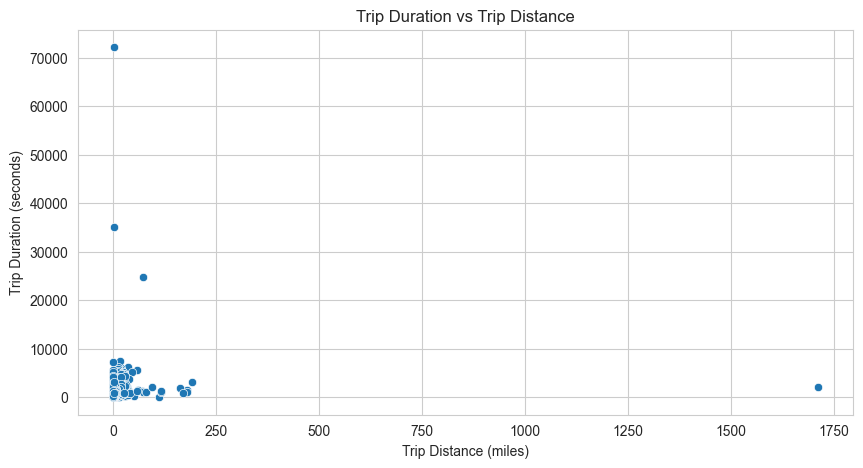

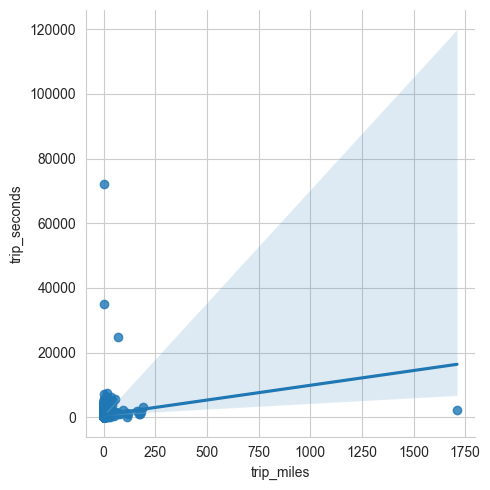

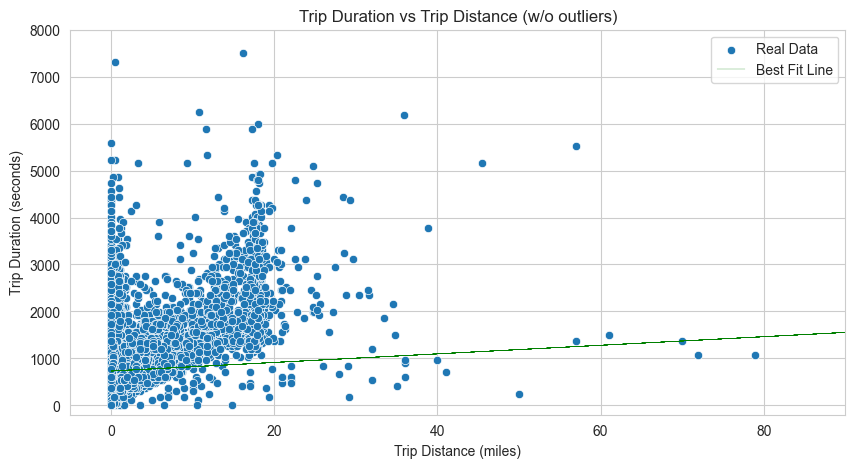

In [ ]:
# Scatter plot for trip duration vs. distance (with outliers)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='trip_miles', y='trip_seconds')
plt.title('Trip Duration vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Trip Duration (seconds)')
plt.show()

sns.set_style('whitegrid') 
sns.lmplot(x ='trip_miles', y ='trip_seconds', data = data) #with outliers

# Scatter plot for trip duration vs. distance removing outliers, adding regressed line
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='trip_miles', y='trip_seconds')
plt.title('Trip Duration vs Trip Distance (w/o outliers)')

b, a = np.polyfit(data['trip_miles'], data['trip_seconds'], deg=1)
plt.plot(data['trip_miles'], a + b * data['trip_miles'], color="g", lw=.2)
plt.legend(['Real Data','Best Fit Line'])

plt.xlim((-5,90))
plt.ylim((-200,8000))
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Trip Duration (seconds)')
plt.show()

## 2d. Seasonal Trends in Taxi Usage and Distance

Below are the line graphs showing the frequency of trips every month and the average distance travelled over trips monthly. We can see even though there is a high demands for taxis over months from April to August and December but the average distance during these months is much lower. In fact for December it is so low that it's own average distance value is very close to the value for the trips during January. We can see that both values are high for the month of October (during the holiday season), people travel over a longer distance per trip. The opposite is true for the months of April to August. 
<br>
The way that this can be useful in allocation is that looking at the trends, we can adjust the number of vehicles in the fleet. So, during months with high demand and low average distance, we would need a bigger fleet with drivers who know that specific area very well. During high demand and average distance travelled season or during the holidays, again we would need a larger fleet to be able to effectively cater to customers spread over a larger area.

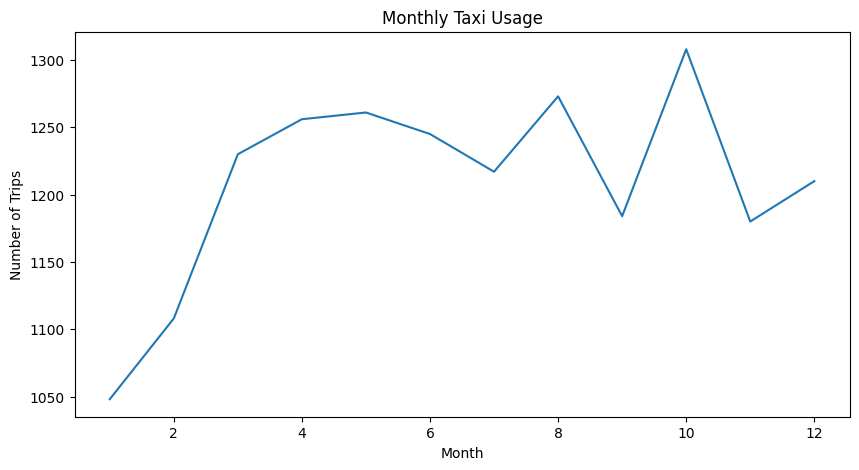

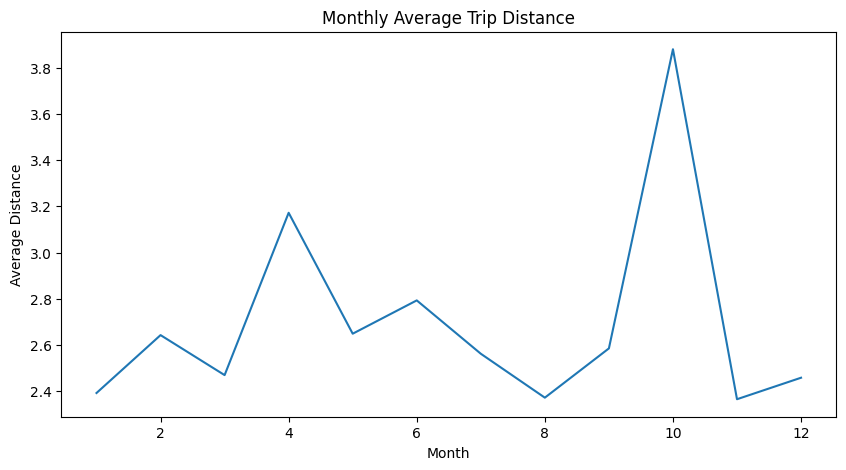

In [43]:
# Line plot for monthly trends in trip frequency and average trip distance
monthly_data = data.groupby('trip_start_month').agg({'trip_miles': 'mean', 'trip_start_timestamp': 'count'}).rename(columns={'trip_start_timestamp': 'trip_count'}).reset_index()

# Trips per month
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x='trip_start_month', y='trip_count')
plt.title('Monthly Taxi Usage')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.show()

# Average trip distance per month
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x='trip_start_month', y='trip_miles')
plt.title('Monthly Average Trip Distance')
plt.xlabel('Month')
plt.ylabel('Average Distance')
plt.show()


## 2e Distance vs. Time of Day

Looking at the line plot we can see that there are two noticeable peaks in average trip distance. The first peak occurs around 5 AM, suggesting longer trips are more common in the early morning hours. Another, smaller peak appears around 3 PM. Interestingly, the average trip distance during the demand peak hours is relatively low compared to early morning and mid-afternoon distance peaks.
<br>
This could indicate that while trip frequency may increase during these hours, the distances traveled are generally shorter, possibly due to more localized travel (e.g., commuting, errands) during these times.

Trip distances appear to fluctuate throughout the day, with no clear increase during typical commute hours, which are often considered high-demand times in urban areas.
These trends could imply that longer trips are more common early in the morning, potentially due to airport runs, early work shifts, or other specific travel needs. In the evening peak hours, people might be traveling shorter distances for routine, more localised activities.

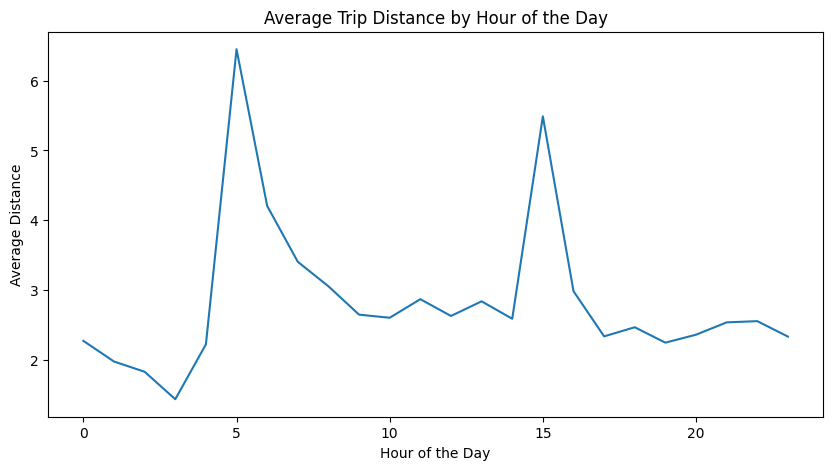

In [44]:
# Line plot for average trip distance by hour of day
hourly_distance = data.groupby('trip_start_hour')['trip_miles'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_distance, x='trip_start_hour', y='trip_miles')
plt.title('Average Trip Distance by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Distance')
plt.show()
